# IMOS Ocean Radar Data Query

The **Australian Coastal Ocean Radar Network** ([ACORN](http://imos.org.au/facilities/oceanradar/)) facility comprises a coordinated network of _HF radars_ delivering:
+ real-time, non-quality controlled and 
+ delayed-mode, quality controlled surface current data into a national archive.

**NetCDF files** can be found at : http://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/catalog.html

Monthly aggregated files are also available in the following folders: 
http://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/catalog.html


<div class="alert alert-block alert-info">
In the example below, we first export the dataset file (NetCDF) for a given region and then we plot the velocity field at a given time in a latitude/longitude grid.</div>

***

**Content:**
- [Data access server protocol](#protocol)
- [ACORN data from IMOS](#imos-data)
- [Get current speed](#current-speed)
- [Plotting Turquoise Coast dataset](#plotting)

***

Loading required modules for this exercise

In [1]:
%matplotlib inline

import cmocean as cmo
from netCDF4 import Dataset
from netCDF4 import num2date
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

## <a name="protocol"></a>  Data access server protocol

+ Data access is provided via **HTTP** and **OPeNDAP** by **THREDDS** Data Server and **FTP**. 
+ Most data providers are using interactive visualization of data sets with zoomable maps. 

Key transfer protocols acronyms:

+ _HTTP_: Hypertext Transfer Protocol
+ _OPenDAP_: Open-source Project for a Network Data Access Protocol
+ _THREDDS_: Thematic Real-Time Environmental Distributed Data Services
+ _FTP_: File Transfer Protocol
+ _LAS_: Live Access Server

## <a name="imos-data"></a>  ACORN data from IMOS

Following previous example, we first export the NetCDF dataset from the IMOS AODN **THREDDS data server**.

<img src="../../figs/ex2-fig1.png" width="60%">

The catalog containing all the ACORN dataset is found on the link below:
+ http://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/catalog.html

You will note that there are several folders corresponding to different radar sites. We will use the dataset from [Turquoise Coast](https://www.google.com/maps/search/turquoise+coast+wa/@-30.3216453,115.0155699,8225m/data=!3m1!1e3?hl=en) in WA.

As shown in the video below, navigate through the folder and pick a year, month and day. **You should be able to take yesterday or today dataset as this is real-time data!**

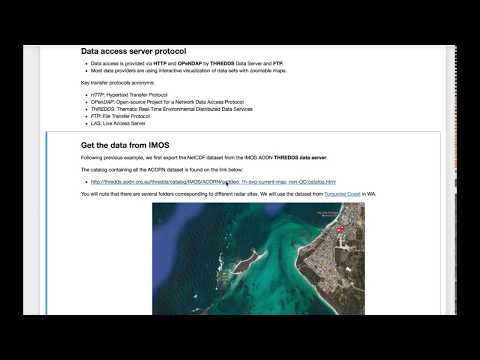

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('qiw0yGzfZak', width=760, height=450)

In [56]:
# Paste the Turquoise Coast dataset URL
acorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/TURQ/2018/01/23/IMOS_ACORN_V_20180123T140000Z_TURQ_FV00_1-hour-avg.nc'
acorn_URL2= 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/TURQ/2022/04/27/IMOS_ACORN_V_20220427T000000Z_TURQ_FV00_1-hour-avg.nc'
# Export the NetCDF file in Python 
acorn_DATA = Dataset(acorn_URL2)

In [57]:
acorn_DATA.dimensions

{'TIME': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'TIME', size = 1,
 'I': <class 'netCDF4._netCDF4.Dimension'>: name = 'I', size = 60,
 'J': <class 'netCDF4._netCDF4.Dimension'>: name = 'J', size = 59}

In [58]:
acorn_DATA.variables.keys()

dict_keys(['TIME', 'I', 'J', 'LATITUDE', 'LONGITUDE', 'GDOP', 'UCUR', 'VCUR', 'UCUR_sd', 'VCUR_sd', 'NOBS1', 'NOBS2', 'UCUR_quality_control', 'VCUR_quality_control'])

In [59]:
acorn_DATA['J']

<class 'netCDF4._netCDF4.Variable'>
int32 J(J)
    long_name: column index (left most value is 1)
    units: 1
    _ChunkSizes: 59
unlimited dimensions: 
current shape = (59,)
filling off

In [60]:
acorn_DATA['UCUR']

<class 'netCDF4._netCDF4.Variable'>
float32 UCUR(TIME, I, J)
    _FillValue: 999999.0
    standard_name: eastward_sea_water_velocity
    long_name: Mean of sea water velocity U component values in 1 hour, after rejection of obvious bad data (see abstract).
    units: m s-1
    valid_min: -10.0
    valid_max: 10.0
    cell_methods: TIME: mean
    ancillary_variables: UCUR_quality_control
    coordinates: TIME LATITUDE LONGITUDE
    _ChunkSizes: [ 1 60 59]
unlimited dimensions: TIME
current shape = (1, 60, 59)
filling off

In [61]:
acorn_DATA.time_coverage_start,acorn_DATA.time_coverage_end

('2022-04-27T00:00:00Z', '2022-04-27T00:00:00Z')

The first thing to notice is the distinctive **Data Reference Syntax** (DRS) associated with the file. Staff at IMOS have archived the data according to the following directory structure:

**http://thredds.aodn.org.au/thredds/dodsC/organisation/project/collection/site-code/year/month/day/**

From this we can deduce, without even inspecting the content of the file, who is the data provider, when and where it was collected, which is a network of high frequency radars that measure the ocean surface current.

*** 

<blockquote>
While it's unlikely that your research will ever involve cataloging data from such a large observational network, it's still a very good idea to develop your own personal **DRS** for the data you do have. This often involves investing some time at the beginning of a project to think carefully about the design of your directory and file name structures, as these can be very hard to change later on. Well planned **DRS** is one of the easiest ways to make your research more efficient and reliable.
</blockquote>


In order to see all the global attributes and some other information about the file, type in your command window

In [62]:
# Discover Metadata
print(acorn_DATA)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    Conventions: CF-1.6,IMOS-1.4
    institution: Australian Coastal Ocean Radar Network (ACORN)
    title: IMOS ACORN Turqoise Coast (TURQ), one hour averaged current RT-QC data, 2022-04-27T00:00:00Z
    instrument: CODAR Ocean Sensors/SeaSonde
    site_code: TURQ, Turqoise Coast
    ssr_Stations: Lancelin (LANC), Green Head (GHED)
    date_created: 2022-04-27T02:30:21Z
    abstract: The ACORN facility is producing NetCDF files containing vector current maps at 1 hour time interval for time instant 2022-04-27 00:00:00Z in the region extending between Longitude: (112.124,115.827) and Latitude:(-32.515,-29.307). The final product is produced on a regular geographic grid. They are produced from radial currents in the Turquoise Coast (WA), which represent the surface sea water current component along the radial direction from a receiver anten

In [63]:
acorn_DATA['TIME']

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00 UTC
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
    _ChunkSizes: 524288
unlimited dimensions: TIME
current shape = (1,)
filling off

In [64]:
acorn_DATA['TIME'][:]

masked_array(data=[26414.],
             mask=False,
       fill_value=1e+20)

To list all the variables available in the NetCDF file, type:

In [65]:
# Discover variables
print(acorn_DATA.variables.keys())

dict_keys(['TIME', 'I', 'J', 'LATITUDE', 'LONGITUDE', 'GDOP', 'UCUR', 'VCUR', 'UCUR_sd', 'VCUR_sd', 'NOBS1', 'NOBS2', 'UCUR_quality_control', 'VCUR_quality_control'])


In [66]:
acorn_DATA['TIME']

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00 UTC
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
    _ChunkSizes: 524288
unlimited dimensions: TIME
current shape = (1,)
filling off

In [67]:
acorn_DATA['TIME'][:]

masked_array(data=[26414.],
             mask=False,
       fill_value=1e+20)

As we have seen already on of the great thing about netCDF files is that they contain <a href=http://en.wikipedia.org/wiki/Metadata>metadata</a> - that is, data about the data. They are **global attributes** that give information about the file as a whole, while each variable also has its own attributes.

The `'u'` means each variable name is represented by a Unicode string. As an example, we plot the attributes associated to the `TIME` variable:

In [68]:
print('These are the attributes of the time axis:')
print(acorn_DATA.variables['TIME'])

print('--------')

print('Here is the time value:')
print(acorn_DATA.variables['TIME'][0])

These are the attributes of the time axis:
<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00 UTC
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
    _ChunkSizes: 524288
unlimited dimensions: TIME
current shape = (1,)
filling off
--------
Here is the time value:
26414.0


The raw time value are fairly meaningless, but we can use the time attributes to convert them to a more meaningful format...

In [69]:
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar

times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)

print('Meaningfull dataset time:')
print(times[0])

Meaningfull dataset time:
2022-04-27 00:00:00


## <a name="current-speed"></a>  Get current speed


First we will need to find the **zonal** (east/west) and **meridional** (north/south) surface current components in our dataset. To do so you will have to use the `acorn_DATA.variables['XXX']` function as above where `XXX` is one of the available variables. 

In [70]:
print(acorn_DATA.variables['UCUR'])
print(acorn_DATA.variables['VCUR'])

<class 'netCDF4._netCDF4.Variable'>
float32 UCUR(TIME, I, J)
    _FillValue: 999999.0
    standard_name: eastward_sea_water_velocity
    long_name: Mean of sea water velocity U component values in 1 hour, after rejection of obvious bad data (see abstract).
    units: m s-1
    valid_min: -10.0
    valid_max: 10.0
    cell_methods: TIME: mean
    ancillary_variables: UCUR_quality_control
    coordinates: TIME LATITUDE LONGITUDE
    _ChunkSizes: [ 1 60 59]
unlimited dimensions: TIME
current shape = (1, 60, 59)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 VCUR(TIME, I, J)
    _FillValue: 999999.0
    standard_name: northward_sea_water_velocity
    long_name: Mean of sea water velocity V component values in 1 hour, after rejection of obvious bad data (see abstract).
    units: m s-1
    valid_min: -10.0
    valid_max: 10.0
    cell_methods: TIME: mean
    ancillary_variables: VCUR_quality_control
    coordinates: TIME LATITUDE LONGITUDE
    _ChunkSizes: [ 1 60 59]
unlimited dime

Let us define python variable for each of these NetCDF variables.

In [71]:
uData2 = acorn_DATA.variables['UCUR'][:,:,:]
vData2 = acorn_DATA.variables['VCUR'][:,:,:]

In [51]:
uData.shape

(1, 60, 59)

Both <i>uData</i> and <i>vData</i> are a special type of **numpy array** known as a masked array, whereby some of the points in the latitude/longitude grid have missing (or masked) values. Just as with a normal numpy array, we can check the shape of our data (in fact, masked arrays can do everything normal numpy arrays can do and more).

In [52]:
print(type(uData))
print(uData.shape)

<class 'numpy.ma.core.MaskedArray'>
(1, 60, 59)


In other words, the dataset contains 1 time step, 60 latitudes and 59 longitudes. 

We can now go ahead and calculate the **current speed** $s$:
$$ s = \sqrt{u^2+v^2} $$


In [72]:
speed2 = (uData2**2 + vData2**2)**0.5

In [54]:
#speed

## <a name="plotting"></a> Plotting Turquoise Coast dataset

<blockquote>
It's a good idea to regularly view your data throughout the code development process, just to ensure nothing crazy has happened along the way.
</blockquote>

/var/folders/px/dgn5m62n7bjbrc1d3cplcv7m0000gn/T/ipykernel_23226/1862544669.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lonData , latData, speed2[0,:,:],cmap=cmo.cm.matter)


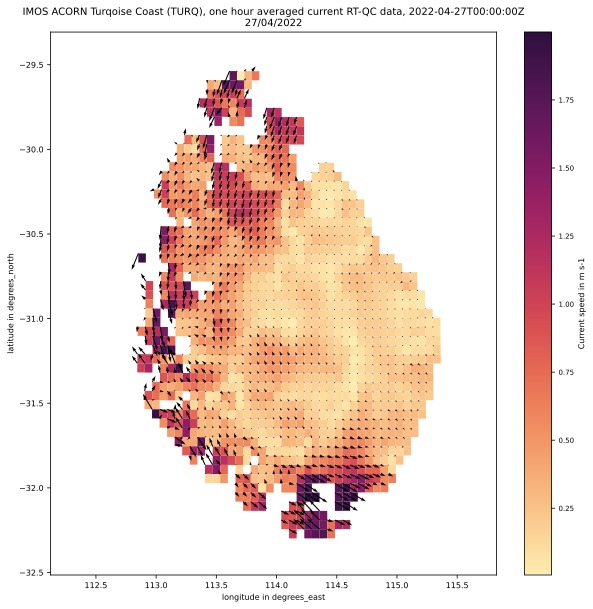

In [74]:
# Get the grid values (long/lat)
LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']
latData = LAT[:]
lonData = LON[:]

# Grab the units for current velocity
units = acorn_DATA.variables['UCUR'].units

figure = plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

# Plot the calculated current speed
plt.pcolor(lonData , latData, speed2[0,:,:],cmap=cmo.cm.matter)
plt.tick_params(axis='both', which='major', labelsize=8)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Current speed in ' + units, fontsize=8)
cbar.ax.tick_params(labelsize=7) 

# Use metadata information as well as time to write the figure title
plt.title(acorn_DATA.title + '\n' + num2date(TIME[0], TIME.units, TIME.calendar).strftime('%d/%m/%Y'), fontsize=10)
plt.xlabel(LON.long_name + ' in ' + LON.units, fontsize=8)
plt.ylabel(LAT.long_name + ' in ' + LAT.units, fontsize=8)

# Plot velocity field as arrows based on zonal and meridional velocity components
Q = plt.quiver(lonData, latData, uData2[0,:,:], vData2[0,:,:], units='width')

plt.show()
plt.close()

***

<div class="alert alert-block alert-success">You can now try to plot 1h averaged sea water speed gridded data from ACORN data at another time interval or on another location and do some data crunching with it!</div>